# **Guía 2**

Objetivo: aplicar los conceptos de Pandas en la manipulación y análisis de datos estructurados. Se trabajará con Series y DataFrames, aplicando técnicas de acceso, selección, filtrado y agregación de datos.

### **Caso de Negocio: Análisis de Deserción de Clientes en una Empresa de Telecomunicaciones**

**Contexto**

En la industria de las telecomunicaciones, la retención de clientes es un factor crítico para la sostenibilidad del negocio. La competencia es feroz y adquirir nuevos clientes suele ser más costoso que mantener a los actuales. En este análisis, exploraremos un conjunto de datos que contiene información detallada sobre clientes que han abandonado el servicio (churn) y aquellos que permanecen activos.

Nuestro objetivo es identificar los factores clave que influyen en la deserción, comprender patrones de comportamiento y generar estrategias efectivas para reducir la tasa de abandono.

La empresa ha experimentado un aumento en la tasa de deserción de clientes, lo que ha provocado:
- Pérdida de ingresos recurrentes.
- Incremento en los costos de adquisición de nuevos clientes.
- Menor estabilidad en la base de clientes a largo plazo.

Para abordar esta problemática, es crucial identificar las razones detrás de la deserción y desarrollar estrategias para mejorar la retención de clientes.



**Entrega del Trabajo**

Los estudiantes deben trabajar en grupos de entre 2 y 4 personas. Cada grupo deberá subir su trabajo a un repositorio de GitHub, asegurándose de que el código y los archivos necesarios estén bien organizados y documentados. Posteriormente, deberán enviar el enlace del repositorio en la plataforma Canvas para su evaluación.

Instrucciones para la entrega:

Crear un repositorio en GitHub con un nombre descriptivo para el proyecto.

Subir el código en Jupyter Notebook (.ipynb) o en formato Python (.py).

Incluir un archivo README.md con una breve descripción del trabajo y las instrucciones de ejecución.

Compartir el enlace del repositorio en Canvas dentro del plazo establecido.



**Descripción de las variables del dataset telecom_churn**

El dataset telecom_churn contiene información detallada sobre clientes de una empresa de telecomunicaciones, incluyendo datos generales, planes contratados, uso del servicio telefónico y llamadas al servicio al cliente. Su propósito principal es analizar patrones de deserción de clientes, identificados a través de la variable churn, que indica si un cliente ha abandonado la empresa (1) o sigue siendo cliente (0).

Dentro del dataset, encontramos información general como el estado (state) donde reside el cliente, el código de área (area code), y el número de teléfono (phone number), aunque esta última variable no aporta información útil para el análisis, ya que es un identificador único.

Además, el dataset registra el tiempo que un cliente ha estado en la empresa a través de la variable account length, lo que puede ayudar a analizar si la duración del contrato influye en la deserción. También se incluyen detalles sobre los planes contratados, como si el cliente tiene un plan internacional (international plan), que le permite realizar llamadas internacionales, o un buzón de voz (voice mail plan), que le permite recibir mensajes de voz.

En cuanto al uso del servicio, se registran datos detallados sobre el tiempo en llamadas y los costos asociados. Se divide en tres períodos del día: diurno (total day minutes, total day calls, total day charge), vespertino (total eve minutes, total eve calls, total eve charge) y nocturno (total night minutes, total night calls, total night charge), lo que permite evaluar si hay patrones de consumo que influyen en la deserción. También se incluye información sobre el uso del servicio internacional, con variables como total intl minutes (minutos en llamadas internacionales), total intl calls (cantidad de llamadas internacionales) y total intl charge (costos por llamadas internacionales).

Otro aspecto clave del dataset es el número de llamadas al servicio al cliente (customer service calls), ya que una mayor cantidad de llamadas puede indicar insatisfacción y estar relacionada con la decisión del cliente de abandonar la empresa.

Finalmente, la variable más importante del análisis es churn, que indica si un cliente ha desertado de la empresa. A partir de esta variable, podemos analizar qué factores influyen en la deserción y encontrar patrones en los clientes que tienen mayor probabilidad de abandonar el servicio.


**Exploración y Limpieza de Datos**

Cargar y explorar el dataset

Importa Pandas y carga el dataset telecom_churn.csv en un DataFrame.

Muestra las primeras 5 filas del DataFrame.

Verifica cuántas filas y columnas tiene el dataset.

Muestra información general del dataset, incluyendo los tipos de datos.

Identifica si hay valores nulos en alguna columna.

In [3]:
import pandas as pd
# Ruta
file_path = r'E:\\OneDrive - Banco Agrario de Colombia S.A\\PROGRAMACION PARA CIENCIA DE DATOS\\telecom_churn.csv'
# Importa el archivo
df = pd.read_csv(file_path)
# Muestra las 5 primeras filas del Df
print("5 primeras filas del Df:")
print(df.head())
# Cuenta filas y columnas tiene el Df
print("\nNúmero de filas y columnas:")
print(df.shape)
# Muestra información general del Df y el tipo de Dato
print("\nInformación general del Df:")
print(df.info())
# Identifica valores nulos en alguna columna
print("\nValores nulos en cada columna:")
print(df.isnull().sum())

5 primeras filas del Df:
  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0         

**Análisis de Churn y Factores Relacionados**

Calcula el porcentaje de clientes que han desertado (churn = 1).

Identifica si los clientes con plan internacional (international plan) tienen mayor tasa de deserción.

Identifica si los clientes con buzón de voz (voice mail plan) tienen menor tasa de deserción.

In [4]:
# Calcula el % de clientes que han desertado churn = 1
Desertados = (df['churn'].sum() / len(df)) * 100
print(f"El porcentaje de clientes que han desertado es: {Desertados:.2f}%")
# Calcula % de deserción para la columna 'international plan'
desercion_international_plan = df[df['international plan'] == 'yes']['churn'].mean() * 100
print(f"El % de deserción para los clientes con 'international plan' es: {desercion_international_plan:.2f}%")
# Calcula si la tasa de deserción para 'international plan' es mayor que el promedio general
if desercion_international_plan > Desertados:
    print("La tasa de deserción para los clientes con 'international plan' es mayor.")
else:
    print("La tasa de deserción para los clientes con 'international plan' es menor.")
    # Calcula la tasa de deserción para la columna 'voice mail plan'
desercion_voicemail_plan = df[df['voice mail plan'] == 'yes']['churn'].mean() * 100
print(f"El % de deserción para los clientes con 'voice mail plan' es: {desercion_voicemail_plan:.2f}%")
# Determina si la tasa de deserción para 'voice mail plan' es menor que el promedio general
if desercion_voicemail_plan < Desertados:
    print("La tasa de deserción para los clientes con 'voice mail plan' es menor que el promedio.")
else:
    print("La tasa de deserción para los clientes con 'voice mail plan' es mayor que el promedio.")

El porcentaje de clientes que han desertado es: 14.49%
El % de deserción para los clientes con 'international plan' es: 42.41%
La tasa de deserción para los clientes con 'international plan' es mayor.
El % de deserción para los clientes con 'voice mail plan' es: 8.68%
La tasa de deserción para los clientes con 'voice mail plan' es menor que el promedio.


**Análisis de la Duración del Servicio y Deserción**

¿Cuál es la duración promedio de la cuenta (account length) entre clientes que desertaron y los que permanecen?

¿Los clientes con cuentas más antiguas tienen más probabilidades de desertar?

In [5]:
# Calcula el promedio de la columna 'account length' para clientes que desertaron
duracion_promedio_desertaron = df[df['churn'] == 1]['account length'].mean()
print(f"La media de la columna 'account length' para clientes que desertaron es: {duracion_promedio_desertaron:.2f}")
# Calcula el promedio de la columna 'account length' para clientes que permanecen
duracion_promedio_permanecen = df[df['churn'] == 0]['account length'].mean()
print(f"La media de la columna 'account length' para clientes que permanecen es: {duracion_promedio_permanecen:.2f}")

La media de la columna 'account length' para clientes que desertaron es: 102.66
La media de la columna 'account length' para clientes que permanecen es: 100.79


**Relación entre Deserción y Uso del Servicio**

Compara la cantidad de minutos usados en llamadas diurnas (total day minutes) entre clientes con y sin churn.

Compara la cantidad de minutos usados en llamadas nocturnas (total night minutes).

Compara el número total de llamadas (total day calls) entre clientes con y sin churn.

In [6]:
# Calcula la cantidad de minutos columna 'total day calls' para clientes que desertaron
duracion_promedio_desertaron = df[df['churn'] == 1]['total day minutes'].sum()
print(f"La cantidad de minutos 'total day minutes' para clientes que desertaron es: {duracion_promedio_desertaron:.2f}")
# Calcula la cantidad de minutos columna 'total day calls' para clientes que permanecen
duracion_promedio_desertaron = df[df['churn'] == 0]['total day minutes'].sum()
print(f"La cantidad de minutos 'total day minutes' para clientes que permanecen es: {duracion_promedio_desertaron:.2f}")

La cantidad de minutos 'total day minutes' para clientes que desertaron es: 99939.50
La cantidad de minutos 'total day minutes' para clientes que permanecen es: 499250.90


**Impacto de las Llamadas al Servicio al Cliente en la Deserción**

Calcula el número promedio de llamadas al servicio al cliente (customer service calls) entre clientes que desertaron y los que no.

Divide los clientes en dos grupos:

- Grupo 1: Clientes que llamaron más de 3 veces al servicio al cliente.
- Grupo 2: Clientes que llamaron 3 veces o menos.
Compara la tasa de churn entre ambos grupos.

In [7]:
# Divide los clientes en dos grupos
G1 = df[df['customer service calls'] > 3]
G2 = df[df['customer service calls'] <= 3]
# Calcula la tasa de desertados para cada grupo
tasa_desertados_G1 = G1['churn'].mean() * 100
tasa_desertados_G2 = G2['churn'].mean() * 100
print(f"La tasa de desertados para el G1 (más de 3 llamadas) es: {tasa_desertados_G1:.2f}%")
print(f"La tasa de desertados para el G2 (3 llamadas o menos) es: {tasa_desertados_G2:.2f}%")

La tasa de desertados para el G1 (más de 3 llamadas) es: 51.69%
La tasa de desertados para el G2 (3 llamadas o menos) es: 11.25%


**Análisis del Costo de las Llamadas y Churn**

Compara el costo total de llamadas diurnas (total day charge) entre clientes con y sin churn.

Compara el costo total de llamadas nocturnas (total night charge).

¿Los clientes con mayor gasto en llamadas internacionales (total intl charge) tienen más probabilidades de desertar?

In [10]:
# Total costo columna (total day charge) para clientes que desertaron
costo_total_day_desertaron = df[df['churn'] == 1]['total day charge'].sum()
print(f"El costo total 'total day charge' para clientes que desertaron es: {costo_total_day_desertaron:.2f}")
# Total costo columna (total day charge) para clientes que permanecen
costo_total_day_permanecen = df[df['churn'] == 0]['total day charge'].sum()
print(f"El costo total 'total day charge' para clientes que permanecen es: {costo_total_day_permanecen:.2f}")
# Total costo columna (total night charge) para clientes que desertaron
costo_total_night_desertaron = df[df['churn'] == 1]['total night charge'].sum()
print(f"El costo total 'total night charge' para clientes que desertaron es: {costo_total_night_desertaron:.2f}")
# Total costo columna (total night charge) para clientes que permanecen
costo_total_night_permanecen = df[df['churn'] == 0]['total night charge'].sum()
print(f"El costo total 'total night charge' para clientes que permanecen es: {costo_total_night_permanecen:.2f}")
# Probabilidad de Desertar
gasto_promedio_intl = df['total intl charge'].mean()
# Divide los clientes en dos grupos:tienen un gasto mayor y los que tienen un gasto menor o igual al promedio
mayor_gasto = df[df['total intl charge'] > gasto_promedio_intl]
menor_gasto = df[df['total intl charge'] <= gasto_promedio_intl]
# Calcula la tasa de deserción para cada grupo
tasa_churn_mayor_gasto = mayor_gasto['churn'].mean() * 100
tasa_churn_menor_gasto = menor_gasto['churn'].mean() * 100
print(f"La Probabilidad de deserción para clientes con > gasto en llamadas internacionales es: {tasa_churn_mayor_gasto:.2f}%")
print(f"La probabilidad de deserción para clientes con <= gasto en llamadas internacionales es: {tasa_churn_menor_gasto:.2f}%")

El costo total 'total day charge' para clientes que desertaron es: 16989.97
El costo total 'total day charge' para clientes que permanecen es: 84874.20
El costo total 'total night charge' para clientes que desertaron es: 4460.76
El costo total 'total night charge' para clientes que permanecen es: 25667.31
La Probabilidad de deserción para clientes con > gasto en llamadas internacionales es: 15.95%
La probabilidad de deserción para clientes con <= gasto en llamadas internacionales es: 12.99%


## Muchas Gracias ##

### Estudiantes :  Diego Florez Castillo & Juan Lozano Novoa
### Cedulas de Ciudadania 1.010.209.979 &       1.010.194952   

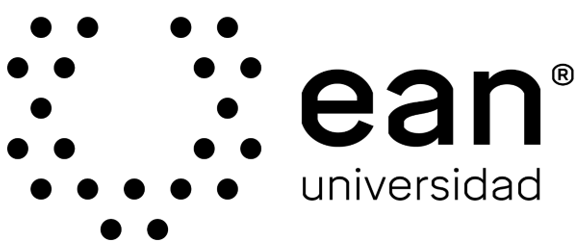